dict_keys(['random_karvhypNSNR', 'lichess9gb_8layer', 'random16M_8layer', 'big_random16M_vocab32', 'lichess9gb_vocab32', 'small_random10gb_vocab32', 'gb_lichess9gb_vocab32', 'lichess_8layers_ckpt_no', 'lichess_karvhyp', 'random_karvhypNS', 'gm_karvhyp'])


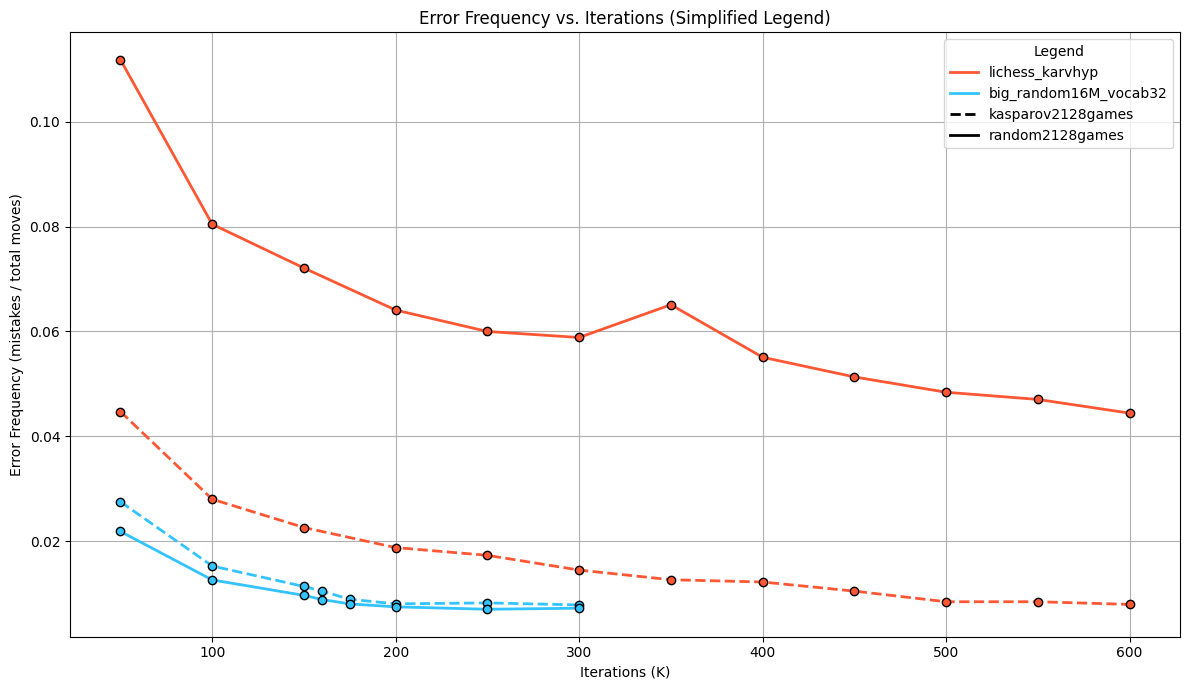

In [ ]:
import json
import importlib
import graphing_results as g
importlib.reload(g)

storage_file = "generation_results.json"
with open(storage_file, "r") as f:
    test_results = json.load(f)
print(test_results.keys())
model_prefixes = ["lichess_karvhyp","big_random16M_vocab32","gm_karvhyp"] 
#model_prefixes = ["random_karvhypNSNR"] 
#datasets_to_include = ['random100games', 'lichess13_100g_180m']

datasets_to_include = ['kasparov2128games',"random2128games"]
#datasets_to_include = ['kasparov2128games']
g.plot_error_frequencies(test_results,model_prefixes, datasets_to_include, [80])


In [4]:
import json

file_path = "generation_results.json"

try:
    with open(file_path, "r", encoding="utf-8") as f:
        json.load(f)  # Try parsing the JSON
    print("✅ JSON is valid!")
except json.JSONDecodeError as e:
    print(f"❌ Invalid JSON: {e}")


❌ Invalid JSON: Expecting ',' delimiter: line 1 column 1990137 (char 1990136)


In [8]:
##code to remodel dictonary

with open(storage_file, "r") as f:
    test_results = json.load(f)

print(test_results["lichess_karvhyp"].keys())
del test_results["lichess_karvhyp"]["0K"]

print(test_results["lichess_karvhyp"].keys())


with open(storage_file, "w") as f:
    json.dump(test_results,f)




dict_keys(['100K', '200K', '300K', '400K', '500K', '250K', '450K', '550K', '600K', '150K', '50K', '350K', '0K'])
dict_keys(['100K', '200K', '300K', '400K', '500K', '250K', '450K', '550K', '600K', '150K', '50K', '350K'])


In [6]:
importlib.reload(g)

#model_names = ["random16M_8layer_50K", "random16M_8layer_100K", "lichess9gb_8layer_50K","lichess9gb_8layer_100K"]
model_names = ["random16M_8layer_22K", "random16M_8layer_50K", "random16M_8layer_80K","random16M_8layer_100K"]
datasets = ['random100games']
max_moves_considered = 100
max_games_considered = 30


g.plot_error_cloud(test_results,model_names,datasets,max_moves_considered,max_games_considered)



AttributeError: module 'graphing_results' has no attribute 'plot_error_cloud'

In [19]:
import pickle
dataset = "eval_datasets/kasparov2128games.pkl"

with open(dataset, 'rb') as f:
    precomputed_games = pickle.load(f)

l = [len(precomputed_games[i]["game_moves"]) for i in range(len(precomputed_games))]
with open("game_lengths", 'w') as f:
    json.dump(l,f)